In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from data.keywords import positive, negative
import re
import collections

<h2>Evaluation</h2>

In [7]:
bist100 = pd.read_csv("../bist100/bist100.csv", delimiter=";")
bist100 = bist100.drop(columns=["Unnamed: 5"])

name_dict = dict()
trust_dict = dict()
for index, row in bist100.iterrows():
    code = row["code"]
    trust_dict[code] = 0

    name_list = list()
    name_list.append(code)
    for name in re.split(r'\s+|\|', row["company"]):
        name_list.append(name)
    name_dict[code] = name_list

In [8]:
for date in os.listdir("news"):
    for agenta in os.listdir(f"news/{date}"):
        f = open(f"news/{date}/{agenta}")
        new_list = f.read().split("-"*50)
        trust = 0
        for new in new_list:
            will_evaluated = list()
            for key, values in name_dict.items():
                for name in values:
                    if name in new:
                        will_evaluated.append(key)
            for pos in positive:
                if pos in new:
                    trust += 1
            for neg in negative:
                if neg in new:
                    trust -= 1.7
            
            for company_code in will_evaluated:
                trust_dict[company_code] += trust 
        

In [10]:
trust_output = open("data/trust_values.csv", "w")

trust_output.write("code,value\n")

sorted_dict = {k: v for k, v in sorted(trust_dict.items(), key=lambda item: item[1])}
#print(sorted_dict)
for key, value in sorted_dict.items():
    trust_output.write(f"{key},{value}\n")

{'CANTE': -13.400000000000002, 'MGROS': -12.200000000000003, 'HEKTS': -11.200000000000003, 'KOZAL': -9.600000000000001, 'KRDMD': -7.800000000000002, 'PENTA': -7.200000000000003, 'ULKER': -7.100000000000004, 'DOAS': -4.500000000000003, 'KARSN': -4.500000000000003, 'ALARK': -1.3000000000000034, 'BERA': -0.700000000000002, 'BRSAN': -0.400000000000001, 'MAVI': -0.400000000000001, 'ECILC': -8.881784197001252e-15, 'SKBNK': 0.19999999999999885, 'IZDMC': 0.599999999999989, 'BUCIM': 1.0999999999999979, 'KOZAA': 1.399999999999994, 'AKBNK': 1.3999999999999964, 'PETKM': 2.599999999999995, 'AKCNS': 2.799999999999997, 'ASELS': 3.6999999999999957, 'ARCLK': 3.6999999999999984, 'IMASM': 3.7999999999999927, 'SOKM': 3.799999999999997, 'CIMSA': 3.9999999999999956, 'KONYA': 5.199999999999996, 'VESTL': 5.299999999999996, 'TKFEN': 7.299999999999993, 'VESBE': 7.399999999999995, 'BRYAT': 7.49999999999999, 'ENJSA': 7.499999999999998, 'DOHOL': 7.599999999999997, 'EGEEN': 7.799999999999996, 'PSGYO': 9.09999999999

<h2>Visualition </h2>

In [11]:
truth_values = pd.read_csv("./data/trust_values.csv")

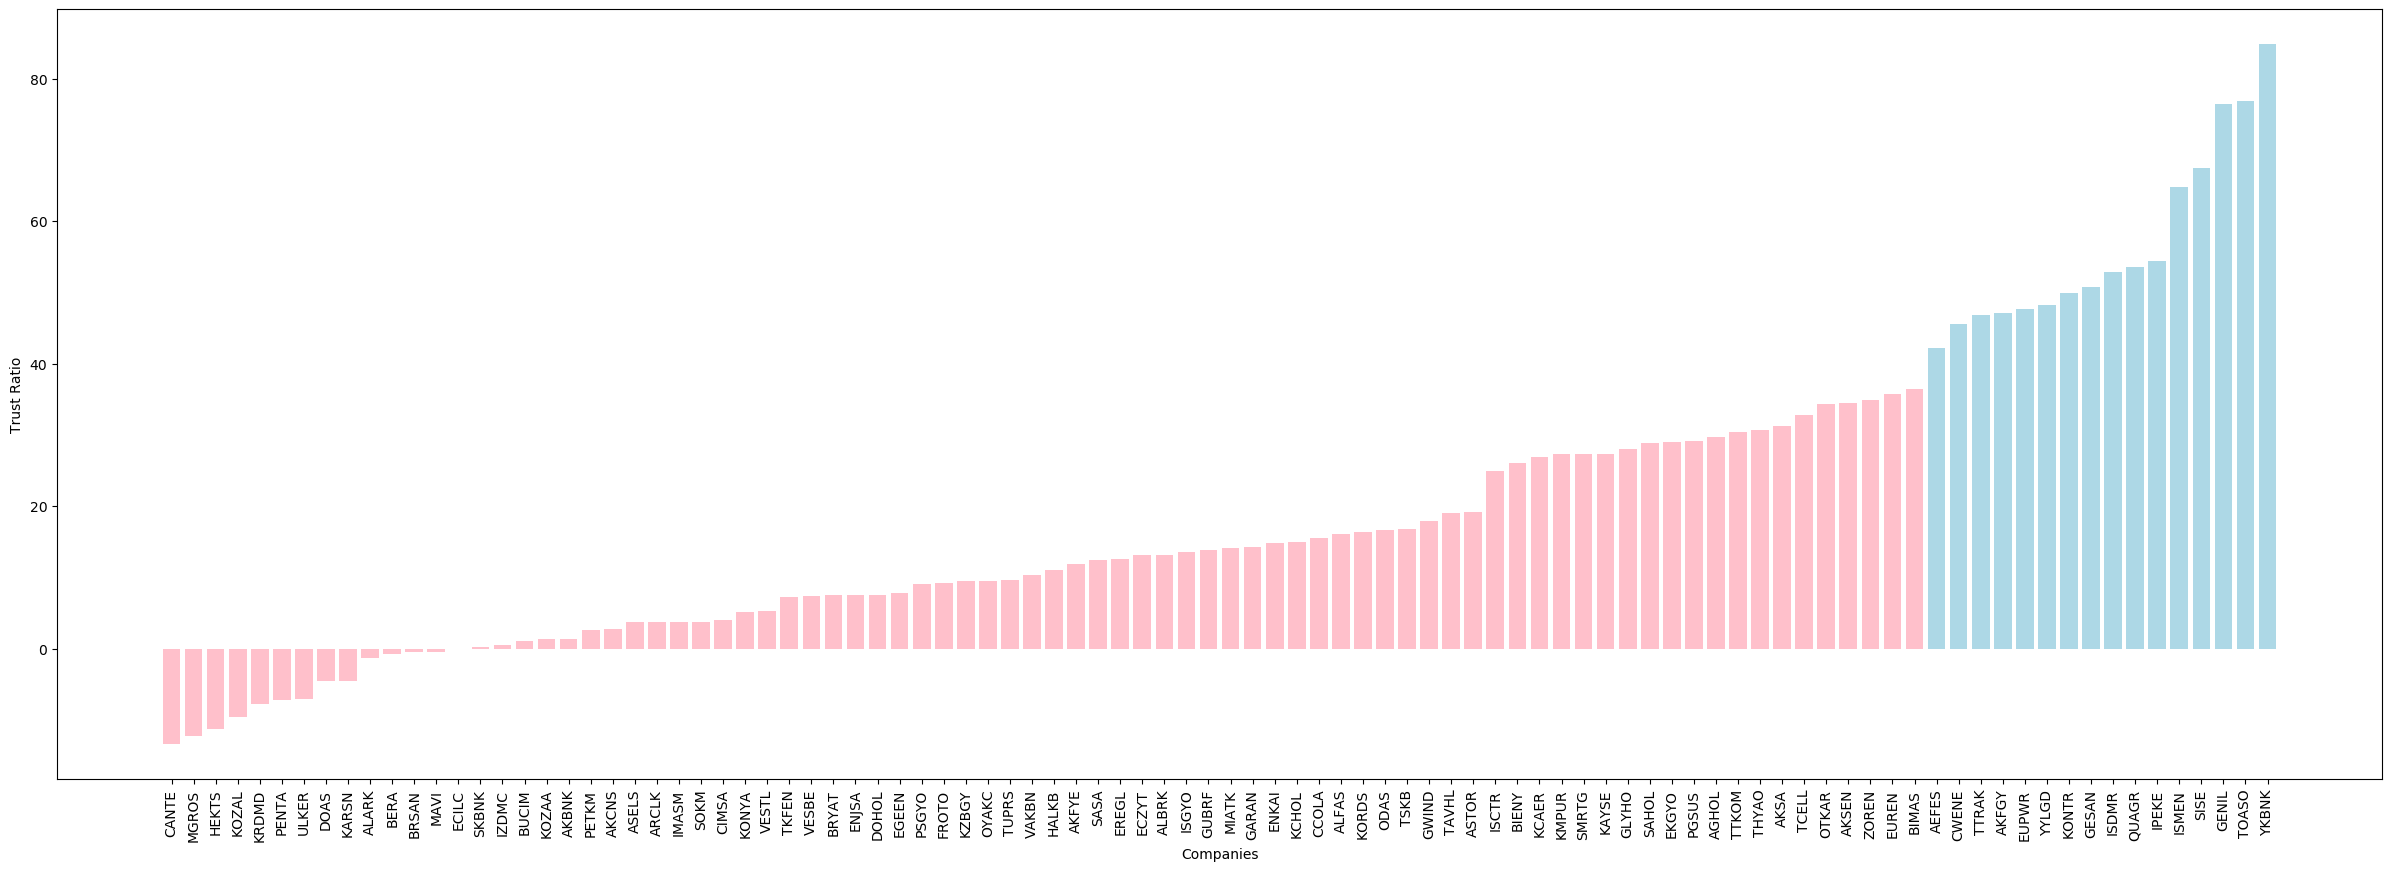

In [12]:
codes = truth_values["code"]
values = truth_values["value"]

filtered_codes_less = list()
filtered_values_less = list()
filtered_codes_more = list()
filtered_values_more = list()
count = 0
for i in range(len(codes)):
    
    if(count < 80):
        count += 1
        filtered_codes_less.append(codes[i])
        filtered_values_less.append(values[i])
    else:
        filtered_codes_more.append(codes[i])
        filtered_values_more.append(values[i])


plt.figure(figsize=(30,10))
plt.bar(filtered_codes_less, filtered_values_less, color="pink")
plt.bar(filtered_codes_more, filtered_values_more, color="lightblue")
plt.ylabel("Trust Ratio")
plt.xlabel("Companies")
plt.xticks(rotation=90)

plt.show()